**Load the saved model from previous step**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import load_model
import progressbar

In [3]:
model = load_model('/content/drive/MyDrive/AI_ML_ExitTest2/Model/FaceRecognition_model2.h5')

In [8]:
import cv2
import os 
from tensorflow.keras.preprocessing.image import img_to_array

Test the model with a sample image. Used MTCNN to detect faces

In [5]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.0 MB/s eta 0:00:00


In [6]:
from mtcnn.mtcnn import MTCNN

In [13]:
imagePath = '/content/drive/MyDrive/AI_ML_ExitTest2/testdata/image3.jpg'

image = cv2.imread(imagePath)
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [14]:
detector = MTCNN()

faces = detector.detect_faces(image1)

2/2 [==============================] - 0s 58ms/step


In [ ]:
from google.colab.patches import cv2_imshow
for face in faces:
  x,y,w,h = face['box']
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image)

In [16]:
import numpy as np

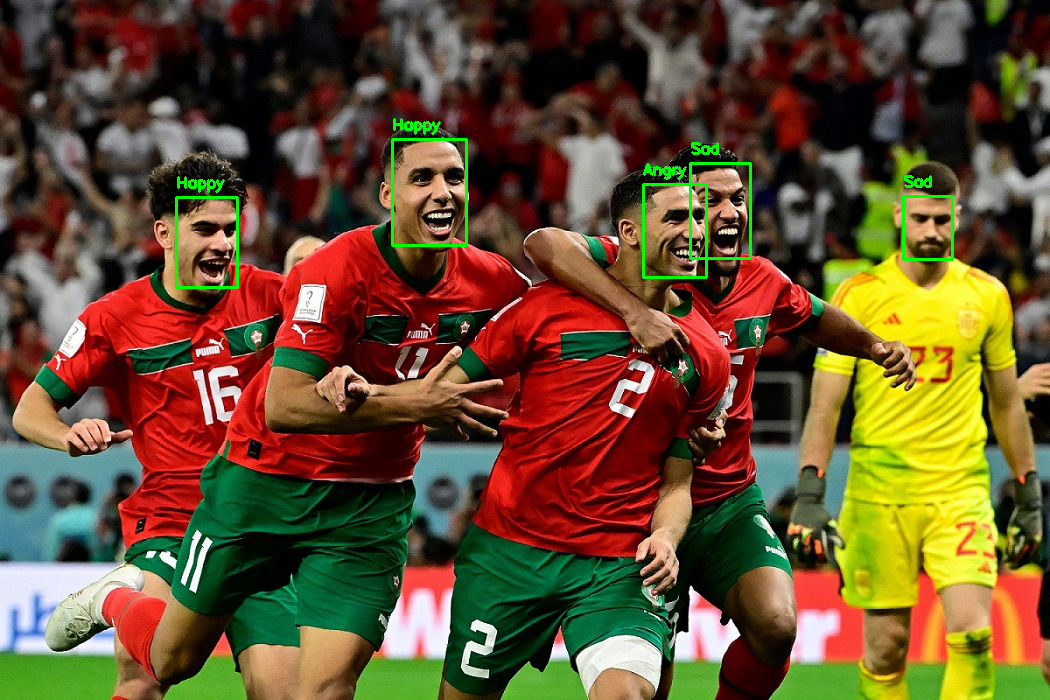

In [17]:
text_list = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
for face in faces:
  (x, y, w, h) = face['box']
  roi_color = image[y:y + h, x:x + w]
  roi = cv2.resize(roi_color, (48, 48))
  roi = roi/255
  pred = model.predict(roi.reshape(1,48,48,3),verbose=0)  
  text_idx=np.argmax(pred)
  if(text_idx==0):    
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, text_list[0], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
  elif text_idx == 1:    
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image,  text_list[1], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
  elif text_idx == 2:    
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image,  text_list[2], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)    
  elif text_idx == 3:    
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image,  text_list[3], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)   
  elif text_idx == 4:    
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image,  text_list[4], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)  
  elif text_idx == 5:    
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image,  text_list[5], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)      
  elif text_idx == 6:    
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image,  text_list[6], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)             
cv2_imshow(image)

**Read the video and convert to frames**

In [18]:
inpath='/content/drive/MyDrive/AI_ML_ExitTest2/testdata/Video4'
outpath = '/content/drive/MyDrive/AI_ML_ExitTest2/testdata/output1'

In [19]:
vid = cv2.VideoCapture(inpath)
frameCount=1; 
while(vid.isOpened()):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    if ret == False:
        break    
  
    cv2.imwrite(os.path.join(outpath , "frame %d.jpg" %frameCount),frame)
    frameCount+=1
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [20]:
frameCount

5777

In [30]:
from tensorflow.keras.preprocessing.image import load_img
text_list = ['Loss', 'Loss', 'Loss', 'Goal', 'Happy', 'Loss', 'Goal']
CHANNELS = 3
moments = []
IMG_SIZE = 48
data=[]

for filename in os.listdir(outpath):
  image = load_img(outpath+'/'+filename, target_size=(IMG_SIZE, IMG_SIZE))
  image = img_to_array(image)
  image = image/255

  pred = model.predict(image.reshape(1,48,48,3),verbose=0)  
  text_idx=np.argmax(pred)
  data.append(image)
  moments.append(text_list[text_idx])

 

In [35]:
data = np.array(data, dtype="float32")

In [36]:
prediction = model.predict(data)

181/181 [==============================] - 59s 323ms/step


In [37]:
np.argmax(prediction, axis=1)

array([4, 4, 4, ..., 5, 5, 5])